# Case: Hunting Basketball Player (POIN: 100)

Anda adalah seorang Data Scientist di tim basket International yang berencana untuk merekrut beberapa pemain basket berbakat untuk meningkatkan performa tim. Tim Anda sering sekali menjadi tim juru kunci dalam klasemen yang mengakibatkan sponsor dari perusahaan swasta dan profit penjualan merchandise pun semakin berkurang. Di sisi lain, tim Anda sudah terlalu lama menghamburkan uang untuk menggaji pemain-pemain yang kurang memiliki bakat. Sehingga para stake holders merasa perlu adanya perombakan pemain, dengan harapan tim Anda lebih sering menang dan profit dari segala sektor pun meningkat

Baru-baru ini manager tim mengatakan berencana untuk mencari 10 pemain baru dari NCAA (National Collegiate Athletic Association) Men's Basketball. Dan berharap Anda, sebagai Data Scientist, untuk dapat menemukan pemain baru yang berbakat dengan cepat. Pemain basket dari NCAA adalah pemain yang belum pernah main di NBA, sehingga mereka belum pernah ikut draft NBA sama sekali.

Data pilihan pemain bisa Anda download di repository ini dengan nama file: new_players.csv. Dalam dataset ini tidak terdapat nama pemain. Maka Anda akan memilih mereka berdasarkan data-data performance mereka selama bermain di NCAA.

Untuk memudahkan proses recruitment, Anda akan menggunakan dataset nba_players.csv sebagai dasar untuk membangun model machine learning untuk menentukan pemain-pemain baru yang pantas Anda rekrut. Kolom potential_player pada dataset NBA adalah acuan Anda. 0 berarti pemain tersebut tidak memiliki potensi dan cenderung untuk tidak direkrut. Dan sebaliknya.

Requirements:

Buatlah sebuah file Jupyter Notebook (.ipynb), bernama "[Nama_Anda]_basketball_team_recruitment.ipynb". Download & gunakan dataset NBA di repository ini dengan nama file: nba_players.csv. Dan penjelasan tiap kolom dapat dilihat di sini

# 

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


import pickle

import warnings


warnings.filterwarnings('ignore')

1. (POIN: 15) Lakukan data preprocessing, seperti menghapus kolom yang sekiranya tidak dibutuhkan, strategi apa yang akan digunakan untuk mengisi missing value, metode apa yang akan digunakan untuk melakukan encoding, feature apa yang bisa ditambahkan, dan lain-lain. Serta berikan penjelasan di setiap langkah yang Anda jalankan.

# Loading Datasets

In [2]:
df_nba = pd.read_csv('nba_players.csv')
df_nba.sample(2)

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
439,439,439,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,...,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,0
2618,2618,2618,Gary Payton,SEA,33.0,193.04,81.64656,Oregon State,USA,1990,...,4.8,9.0,3.2,0.029,0.110,0.271,0.526,0.391,2001-02,1


In [3]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [4]:
df_nba.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

In [5]:
df_nba.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [6]:
df_nba.describe(include='object')

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,11145,11145,11145,11145,11145,11145,11145,11145
unique,2235,36,316,76,45,8,75,24
top,Vince Carter,TOR,None,USA,Undrafted,1,Undrafted,2017-18
freq,22,390,1684,9410,1942,6513,1959,540


In [7]:
list_item = []
for col in df_nba.columns:
    list_item.append([col, df_nba[col].dtype, df_nba[col].isna().sum(), round((df_nba[col].isna().sum()/len(df_nba[col]))*100,2),
                      df_nba[col].nunique(), list(df_nba[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'type_data', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,type_data,null,nulPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,11145,"[10920, 8013, 977, 9223, 10417]"
1,Unnamed: 0.1,int64,0,0.0,11145,"[2923, 4058, 3775, 6857, 8439]"
2,player_name,object,0,0.0,2235,"[Shane Heal, Erick Dampier, Victor Oladipo, Ja..."
3,team_abbreviation,object,0,0.0,36,"[POR, VAN, LAL, CHH, CHI]"
4,age,float64,0,0.0,27,"[26.0, 27.0, 36.0, 23.0, 24.0]"
5,player_height,float64,0,0.0,30,"[180.34, 198.12, 203.2, 185.42]"
6,player_weight,float64,0,0.0,157,"[113.398, 97.52228000000001, 93.439952, 81.646..."
7,college,object,0,0.0,316,"[Florida, Michigan State, Kentucky, Georgia Te..."
8,country,object,0,0.0,76,"[USA, Venezuela]"
9,draft_year,object,0,0.0,45,"[1996, Undrafted, 1992, 1997, 1993]"


### Insights
1. We do not have a NaN data for every single rows and columns
2. All the statistics calculation can be read above

# 

# 1. Preprocessing

<function matplotlib.pyplot.show(close=None, block=None)>

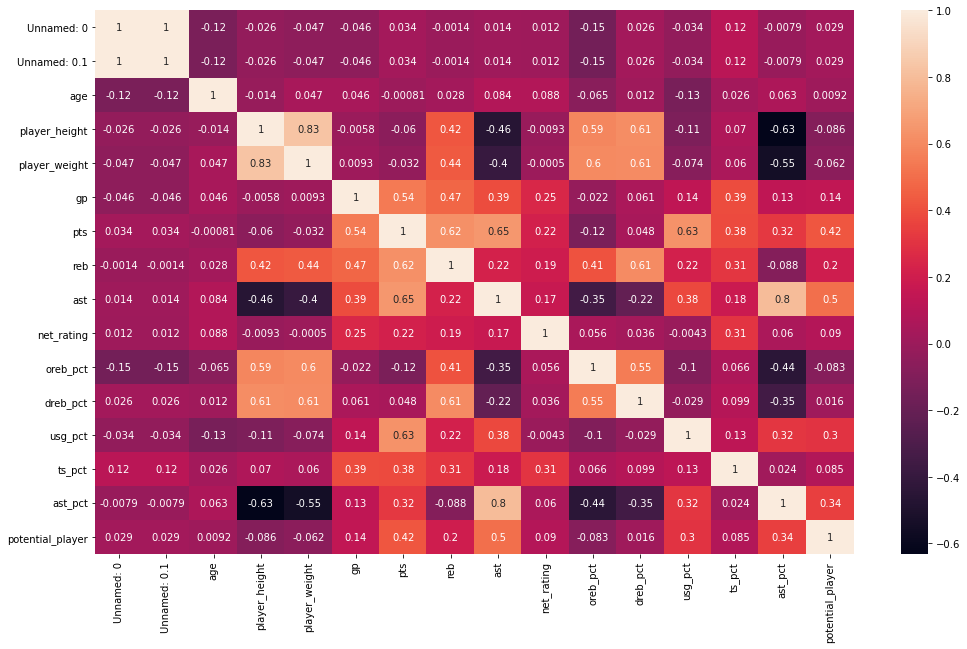

In [8]:
plt.figure(figsize=(17,10))
sns.heatmap(df_nba.corr(), annot=True)
plt.show

In [9]:
df_nba.sample(2)

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
4553,4553,4553,Antoine Walker,MIA,30.0,205.74,111.130040,Kentucky,USA,1996,...,4.3,1.7,0.6,0.061,0.160,0.224,0.462,0.122,2006-07,0
9754,9754,9754,Rajon Rondo,NOP,32.0,185.42,84.368112,Kentucky,USA,2006,...,4.0,8.2,0.8,0.018,0.124,0.164,0.522,0.406,2017-18,0


In [10]:
df_nba.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

In [11]:
df_nba_drop = df_nba.drop(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number',
                          'season'], axis=1)
df_nba_drop.sample(4)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
7586,27.0,213.36,116.119552,35,12.7,3.7,1.1,-5.8,0.029,0.123,0.233,0.482,0.064,0
627,32.0,200.66,83.914520,81,19.5,2.9,2.1,10.5,0.021,0.075,0.237,0.619,0.106,0
235,27.0,208.28,117.933920,69,3.8,2.4,0.6,1.3,0.088,0.166,0.177,0.547,0.098,0
5354,30.0,182.88,86.182480,6,2.3,0.7,1.8,-21.1,0.000,0.154,0.131,0.778,0.440,0


### Insights
1. We just focus on the ability for each player. As you can see we do not need a categorical feature so that we can drop those features.
2. We use the rest of features to build our model, but later on it could be 'reduced' do to the feature engineering method

# 2. EDA

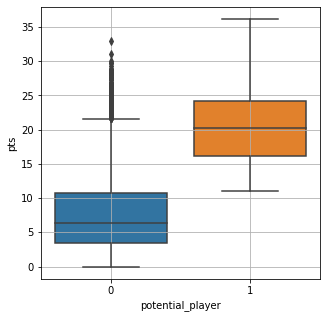

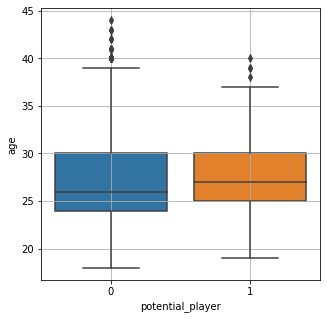

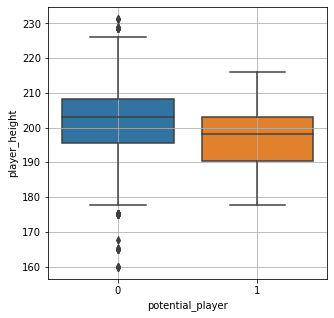

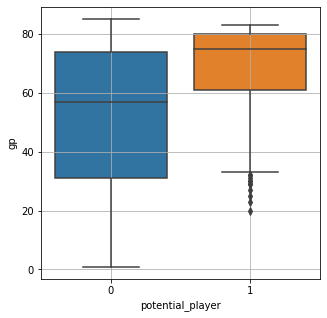

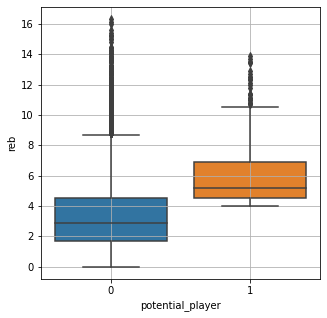

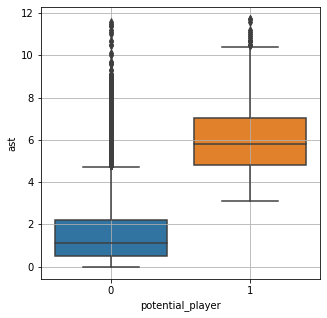

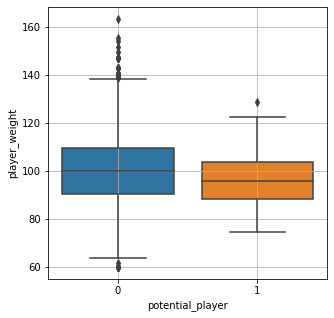

In [12]:
plt.figure(figsize=(5,5))
# plt.subplot(211)
sns.boxplot(x='potential_player', y='pts', data=df_nba_drop)
plt.grid()
plt.show()

plt.figure(figsize=(5,5))
# plt.subplot(212)
sns.boxplot(x='potential_player', y='age', data=df_nba_drop)
plt.grid()
plt.show()

plt.figure(figsize=(5,5))
# plt.subplot(222)
sns.boxplot(x='potential_player', y='player_height', data=df_nba_drop)
plt.grid()
plt.show()

plt.figure(figsize=(5,5))
# plt.subplot(222)
sns.boxplot(x='potential_player', y='gp', data=df_nba_drop)
plt.grid()
plt.show()

plt.figure(figsize=(5,5))
# plt.subplot(211)
sns.boxplot(x='potential_player', y='reb', data=df_nba_drop)
plt.grid()
plt.show()

plt.figure(figsize=(5,5))
# plt.subplot(211)
sns.boxplot(x='potential_player', y='ast', data=df_nba_drop)
plt.grid()
plt.show()

plt.figure(figsize=(5,5))
# plt.subplot(211)
sns.boxplot(x='potential_player', y='player_weight', data=df_nba_drop)
plt.grid()
plt.show()

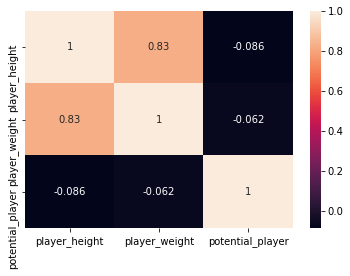

In [13]:
sns.heatmap(df_nba_drop[['player_height', 'player_weight', 'potential_player']].corr(), annot=True)
plt.show()

In [14]:
df_nba['college'].value_counts(ascending=False)
# Kentucky has the highest supply for NBA player

None                  1684
Kentucky               360
Duke                   331
North Carolina         318
UCLA                   280
                      ... 
West Virginia Tech       1
Northern Arizona         1
Morehouse                1
Midwestern State         1
Ohio U.                  1
Name: college, Length: 316, dtype: int64

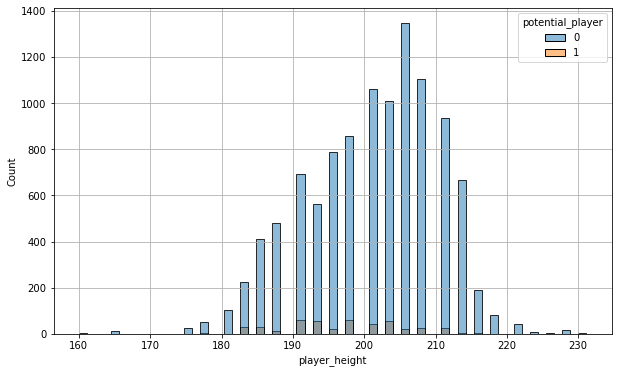

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(x = df_nba['player_height'], hue=df_nba['potential_player'])
plt.grid()
plt.show()

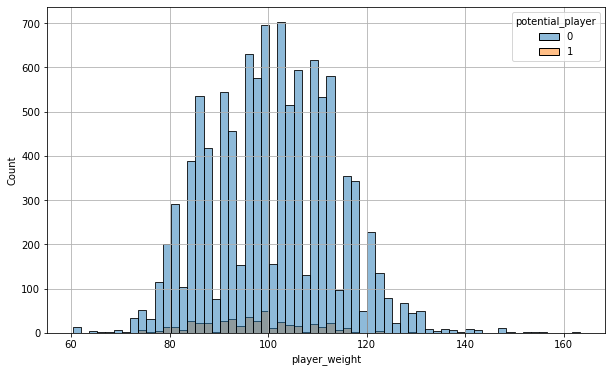

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(x = df_nba['player_weight'], hue=df_nba['potential_player'])
plt.grid()
plt.show()

In [17]:
df_nba_drop['potential_player'].value_counts()

0    10690
1      455
Name: potential_player, dtype: int64

In [18]:
df_nba_drop['potential_player'].value_counts(normalize=True)

0    0.959175
1    0.040825
Name: potential_player, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

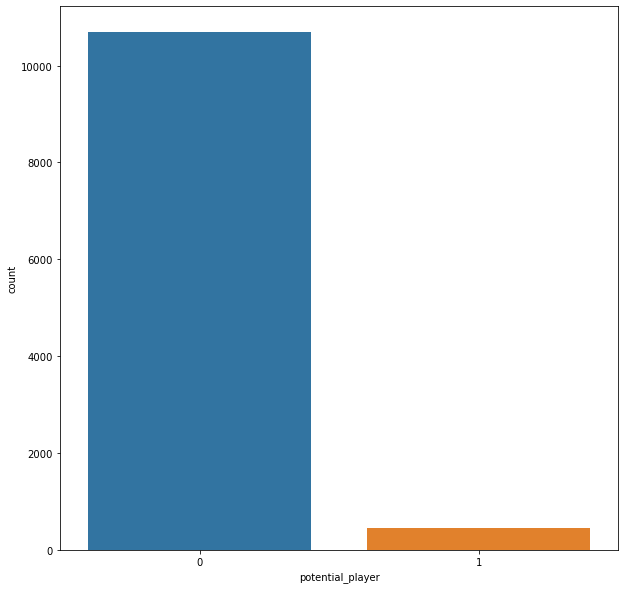

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df_nba_drop['potential_player'])
plt.show

### Insights
1. Potential players have a higher pts than non-potential (Points/Score) = Based on Boxplot
2. Potential players have a higher reb than non-potential (Rebound) = Based on Boxplot
3. Potential players have a higher ast than non-potential (Assist) = Based on Boxplot
4. Height and Weight also have a no correlation with the potential at all = Based on Heatmap
5. Kentucky has the most highest supplier player to thee NBA

# 3. Data Splitting

We need to standardize for every single value in each columns using Scaler

In [20]:
df_nba_drop.sample(2)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
6735,29.0,190.50,87.089664,63,11.3,1.8,5.0,2.4,0.008,0.066,0.197,0.564,0.271,0
8044,25.0,200.66,102.058200,26,8.0,2.3,0.8,-6.9,0.026,0.087,0.187,0.436,0.060,0


In [21]:
scaler = MinMaxScaler()
scaler.fit(df_nba_drop)
nba_scaled = scaler.transform(df_nba_drop)
nba_scaled = pd.DataFrame(nba_scaled, columns=df_nba_drop.columns)
nba_scaled.sample(5)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
816,0.615385,0.535714,0.405286,0.845238,0.146814,0.079755,0.094017,0.3848,0.014,0.075,0.206,0.265333,0.112,0.0
1544,0.807692,0.642857,0.559471,0.952381,0.182825,0.220859,0.068376,0.4180,0.047,0.156,0.157,0.370000,0.070,0.0
1582,0.153846,0.500000,0.246696,0.392857,0.119114,0.085890,0.051282,0.3930,0.031,0.117,0.202,0.304667,0.094,0.0
7291,0.269231,0.607143,0.471366,0.559524,0.146814,0.306748,0.068376,0.3814,0.120,0.181,0.145,0.339333,0.079,0.0
6390,0.461538,0.607143,0.361233,0.273810,0.019391,0.030675,0.017094,0.4152,0.026,0.078,0.114,0.184667,0.043,0.0


In [22]:
X = nba_scaled.drop(['potential_player'], axis=1)
y = nba_scaled['potential_player']
# X
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11140    0.0
11141    0.0
11142    0.0
11143    0.0
11144    0.0
Name: potential_player, Length: 11145, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020, test_size=.2)

# 4. Machine Learning Model
1. Decision Tree
2. KNN

#### Situation and Objectives
1. This is a predicting cases that focus on detecting the '0'.'Not potential' player precisely due to company economic situation
2. The company doesnt want to have a wrong decision about hire the player
3. We must focus on how to predict the '0' value perfectly
4. Then we are interested to decreasing the FP (False positive)
5. FP value is strongly correlated with precision metrics (Precision = TP/(TP+FP))
6. Finally we must concern to Precision Score

## 4.1 Decision Tree

In [24]:
model = DecisionTreeClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('DTree CV Recall precision',model_cv)
  print('DTree CV precision score mean',model_cv.mean())
  print('DTree CV precision score std',model_cv.std())

In [25]:
#Training
tree_model_cv = model_evaluation_cv(model, 'recall')
print_result(tree_model_cv)

DTree CV Recall precision [0.95890411 0.94444444 0.97260274 0.97260274 0.98630137]
DTree CV precision score mean 0.9669710806697107
DTree CV precision score std 0.014209972623420159


In [27]:
#Test
dtree_ = DecisionTreeClassifier()
dtree_.fit(X_train,y_train)
y_pred_tree = dtree_.predict(X_test)
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2138
         1.0       0.97      0.97      0.97        91

    accuracy                           1.00      2229
   macro avg       0.98      0.98      0.98      2229
weighted avg       1.00      1.00      1.00      2229



In [28]:
print('Decision Tree precision :', precision_score(y_test, y_pred_tree))

Decision Tree precision : 0.967032967032967


## 4.2 KNN

In [29]:
model = KNeighborsClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('KNN CV precision score',model_cv)
  print('KNN CV precision score mean',model_cv.mean())
  print('KNN CV precision score std',model_cv.std())

In [30]:
knn_model_cv = model_evaluation_cv(model, 'precision')
print_result(knn_model_cv)

KNN CV precision score [0.91525424 0.8125     0.85416667 0.8627451  0.85507246]
KNN CV precision score mean 0.8599476931524268
KNN CV precision score std 0.0327875312050215


In [31]:
#Test
knn_ = KNeighborsClassifier()
knn_.fit(X_train,y_train)
y_pred_knn = knn_.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2138
         1.0       0.85      0.66      0.74        91

    accuracy                           0.98      2229
   macro avg       0.92      0.83      0.87      2229
weighted avg       0.98      0.98      0.98      2229



In [32]:
print('KNN precision :', precision_score(y_test, y_pred_knn))

KNN precision : 0.8450704225352113


### Insights
1. Decision Tree has a bigger precision score than KNN
2. Decision Tree > KNN

# 

# 5. Increasing Model Preformance and Model Comparison

## 5.1 Feature Selection : SelectPercentile

In [33]:
select = SelectPercentile(percentile = 50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [34]:
X_train_preprocessed_selected = select.transform(X_train)
X_test_preprocessed_selected = select.transform(X_test)

In [35]:
print('before selection',X_train.shape)
print('after selection',X_train_preprocessed_selected.shape)

before selection (8916, 13)
after selection (8916, 6)


### 5.1.1 Decision Tree

In [36]:
model = DecisionTreeClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_preprocessed_selected, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('DTree_Poly CV precision score',model_cv)
  print('DTree CV_Poly precision score mean',model_cv.mean())
  print('DTree CV_Poly precision score std',model_cv.std())

In [37]:
#Training
tree_select_model_cv = model_evaluation_cv(model, 'recall')
print_result(tree_select_model_cv)

DTree_Poly CV precision score [0.97260274 0.93055556 0.97260274 1.         1.        ]
DTree CV_Poly precision score mean 0.9751522070015219
DTree CV_Poly precision score std 0.025442824217295844


In [38]:
tree_ = DecisionTreeClassifier()
tree_.fit(X_train_preprocessed_selected,y_train)
y_pred_tree_selected = tree_.predict(X_test_preprocessed_selected)
print(classification_report(y_test,y_pred_tree_selected))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2138
         1.0       0.99      0.97      0.98        91

    accuracy                           1.00      2229
   macro avg       0.99      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [39]:
print('Decision Tree_Selected precision :', precision_score(y_test, y_pred_tree_selected))

Decision Tree_Selected precision : 0.9887640449438202


In [40]:
model_com = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, y_pred_tree),precision_score(y_test, y_pred_tree),
                       recall_score(y_test, y_pred_tree),f1_score(y_test, y_pred_tree)],
    "Decision Tree Selected": [accuracy_score(y_test, y_pred_tree_selected),
                             precision_score(y_test, y_pred_tree_selected),recall_score(y_test, y_pred_tree_selected),
                             f1_score(y_test, y_pred_tree_selected)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,Decision Tree,Decision Tree Selected
Accuracy Score,0.997308,0.998205
Precision Score,0.967033,0.988764
Recall Score,0.967033,0.967033
F1 Score,0.967033,0.977778


### 5.1.2 KNN

In [41]:
model = KNeighborsClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_preprocessed_selected, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('KNN_Poly CV precision score',model_cv)
  print('KNN_Poly CV precision score mean',model_cv.mean())
  print('KNN_Poly CV precision score std',model_cv.std())

In [42]:
knn_select_model_cv = model_evaluation_cv(model, 'precision')
print_result(knn_select_model_cv)

KNN_Poly CV precision score [0.91044776 0.7962963  0.82352941 0.9122807  0.80246914]
KNN_Poly CV precision score mean 0.8490046613623774
KNN_Poly CV precision score std 0.051714266955557475


In [43]:
knn_ = KNeighborsClassifier()
knn_.fit(X_train_preprocessed_selected,y_train)
y_pred_knn_selected = knn_.predict(X_test_preprocessed_selected)
print(classification_report(y_test,y_pred_knn_selected))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2138
         1.0       0.85      0.67      0.75        91

    accuracy                           0.98      2229
   macro avg       0.92      0.83      0.87      2229
weighted avg       0.98      0.98      0.98      2229



In [44]:
print('KNN_Selected Recall :', precision_score(y_test, y_pred_knn_selected))

KNN_Selected Recall : 0.8472222222222222


In [45]:
model_com = pd.DataFrame({
    "KNN": [accuracy_score(y_test, y_pred_knn),precision_score(y_test, y_pred_knn),
                       recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn)],
    "KNN Selected": [accuracy_score(y_test, y_pred_knn_selected),
                             precision_score(y_test, y_pred_knn_selected),recall_score(y_test, y_pred_knn_selected),
                             f1_score(y_test, y_pred_knn_selected)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,KNN,KNN Selected
Accuracy Score,0.981157,0.981606
Precision Score,0.845070,0.847222
Recall Score,0.659341,0.670330
F1 Score,0.740741,0.748466


### Insights
1. Decision Tree : Feature Selection decreases the recall score
2. KNN :Feature Selection increases the recall score

## 5.2 Preprocessing : Polynomial

In [46]:
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False) 
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

### 5.2.1 Decision Tree

In [47]:
model = DecisionTreeClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_poly, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('DTree_Poly CV precision score',model_cv)
  print('DTree CV_Poly precision score mean',model_cv.mean())
  print('DTree CV_Poly precision score std',model_cv.std())

In [48]:
tree_poly_model_cv = model_evaluation_cv(model, 'precision')
print_result(tree_poly_model_cv)

DTree_Poly CV precision score [1.         0.86567164 0.90666667 0.98571429 0.97333333]
DTree CV_Poly precision score mean 0.9462771855010661
DTree CV_Poly precision score std 0.05145815326176091


In [49]:
tree_ = DecisionTreeClassifier()
tree_.fit(X_train_poly,y_train)
y_pred_tree_poly = tree_.predict(X_test_poly)
print(classification_report(y_test,y_pred_tree_poly))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2138
         1.0       0.96      0.96      0.96        91

    accuracy                           1.00      2229
   macro avg       0.98      0.98      0.98      2229
weighted avg       1.00      1.00      1.00      2229



In [50]:
model_com = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, y_pred_tree),precision_score(y_test, y_pred_tree),
                       recall_score(y_test, y_pred_tree),f1_score(y_test, y_pred_tree)],
    "Decision Tree Poly": [accuracy_score(y_test, y_pred_tree_poly),
                             precision_score(y_test, y_pred_tree_poly),recall_score(y_test, y_pred_tree_poly),
                             f1_score(y_test, y_pred_tree_poly)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,Decision Tree,Decision Tree Poly
Accuracy Score,0.997308,0.996411
Precision Score,0.967033,0.956044
Recall Score,0.967033,0.956044
F1 Score,0.967033,0.956044


### 5.2.2 KNN

In [51]:
model = KNeighborsClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_poly, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('KNN_Poly CV precision score',model_cv)
  print('KNN_Poly CV precision score mean',model_cv.mean())
  print('KNN_Poly CV precision score std',model_cv.std())

In [52]:
knn_poly_model_cv = model_evaluation_cv(model, 'precision')
print_result(knn_poly_model_cv)

KNN_Poly CV precision score [0.90196078 0.80851064 0.85106383 0.87234043 0.83870968]
KNN_Poly CV precision score mean 0.8545170710700203
KNN_Poly CV precision score std 0.03145462864644146


In [53]:
knn_ = KNeighborsClassifier()
knn_.fit(X_train_poly,y_train)
y_pred_knn_poly = knn_.predict(X_test_poly)
print(classification_report(y_test,y_pred_knn_poly))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2138
         1.0       0.85      0.58      0.69        91

    accuracy                           0.98      2229
   macro avg       0.92      0.79      0.84      2229
weighted avg       0.98      0.98      0.98      2229



In [54]:
model_com = pd.DataFrame({
    "KNN Tree": [accuracy_score(y_test, y_pred_knn),precision_score(y_test, y_pred_knn),
                       recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn)],
    "KNN Tree Poly": [accuracy_score(y_test, y_pred_knn_poly),
                             precision_score(y_test, y_pred_knn_poly),recall_score(y_test, y_pred_knn_poly),
                             f1_score(y_test, y_pred_knn_poly)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,KNN Tree,KNN Tree Poly
Accuracy Score,0.981157,0.978914
Precision Score,0.845070,0.854839
Recall Score,0.659341,0.582418
F1 Score,0.740741,0.692810


### Insights
1. Decision Tree : Polynomial transform decreases the recall score
2. KNN : Polynomial transform decreases the recall score

## 5.3 Preprocessing : Hyperparameter Tuning

### 5.3.1 Decision Tree

In [55]:
# Decision Tree Classifier Model
dtree = DecisionTreeClassifier()

# Hyperparameter
hyperparam_space = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_features':['auto', 'sqrt', 'log2', 'none'],
    'class_weight':['balanced', 'none'],
    'min_samples_split':[2,3,4,5]
}

# Cross Validation
skfold = StratifiedKFold(n_splits=5)

# Searching with GridSearch - Cross Validation
dtree_grid_search = GridSearchCV(
    dtree,
    param_grid = hyperparam_space,
    cv = skfold,
    n_jobs=-1,
    scoring='precision'
)

In [56]:
dtree_grid_search.fit(X_train, y_train)
print('DTree Best Params:',dtree_grid_search.best_params_)
print('DTree Best Params:',dtree_grid_search.best_score_)

DTree Best Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4, 'splitter': 'best'}
DTree Best Params: 0.9831757669303492


In [57]:
dtree_tuned = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_features='auto', min_samples_split=2, splitter='best')
dtree_tuned.fit(X_train, y_train)
y_pred_tree_tuned = dtree_tuned.predict(X_test)
print(classification_report(y_test,y_pred_tree_tuned))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2138
         1.0       1.00      0.99      0.99        91

    accuracy                           1.00      2229
   macro avg       1.00      0.99      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [58]:
model_com = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, y_pred_tree),precision_score(y_test, y_pred_tree),
                       recall_score(y_test, y_pred_tree),f1_score(y_test, y_pred_tree)],
    "Decision Tree Tuned": [accuracy_score(y_test, y_pred_tree_tuned),
                             precision_score(y_test, y_pred_tree_tuned),recall_score(y_test, y_pred_tree_tuned),
                             f1_score(y_test, y_pred_tree_tuned)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,Decision Tree,Decision Tree Tuned
Accuracy Score,0.997308,0.999551
Precision Score,0.967033,1.000000
Recall Score,0.967033,0.989011
F1 Score,0.967033,0.994475


### 5.3.2 KNN

In [59]:
# KNN Classifier Model
knn = KNeighborsClassifier()

# Hyperparameter
hyperparam_space = {
    'n_neighbors':[3,5,7,9,11,13,15,17],
    'weights':['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute', 'auto']    
}

# Cross Validation
skfold = StratifiedKFold(n_splits=5)

# Searching with GridSearch - Cross Validation
knn_grid_search = GridSearchCV(
    knn,
    param_grid = hyperparam_space,
    cv = skfold,
    n_jobs=-1,
    scoring='precision'
)

In [60]:
knn_grid_search.fit(X_train, y_train)
print('KNN Best Params:',knn_grid_search.best_params_)
print('KNN Best Params:',knn_grid_search.best_score_)

KNN Best Params: {'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance'}
KNN Best Params: 0.9275699168556312


In [61]:
knn_tuned =KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='uniform')
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)
print(classification_report(y_test,y_pred_knn_tuned))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2138
         1.0       0.81      0.69      0.75        91

    accuracy                           0.98      2229
   macro avg       0.90      0.84      0.87      2229
weighted avg       0.98      0.98      0.98      2229



In [62]:
model_com = pd.DataFrame({
    "KNN Tree": [accuracy_score(y_test, y_pred_knn),precision_score(y_test, y_pred_knn),
                       recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn)],
    "KNN Tree Tuned": [accuracy_score(y_test, y_pred_knn_tuned),
                             precision_score(y_test, y_pred_knn_tuned),recall_score(y_test, y_pred_knn_tuned),
                             f1_score(y_test, y_pred_knn_tuned)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,KNN Tree,KNN Tree Tuned
Accuracy Score,0.981157,0.980709
Precision Score,0.845070,0.807692
Recall Score,0.659341,0.692308
F1 Score,0.740741,0.745562


### Insights
1. Decision Tree : Hyperparameter tuning increases the recall score
2. KNN : Hyperparameter tuning increases the recall score

## 5.4 Preprocessing : Resampling (RUS)

In [63]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

### 5.4.1 Decision Tree

In [64]:
y_train_rus.value_counts()

1.0    364
0.0    364
Name: potential_player, dtype: int64

In [65]:
model = DecisionTreeClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_rus, y_train_rus, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('DTree_RUS CV precision score',model_cv)
  print('DTree CV_RUS precision score mean',model_cv.mean())
  print('DTree CV_RUS precision score std',model_cv.std())

In [66]:
tree_rus_model_cv = model_evaluation_cv(model, 'precision')
print_result(tree_rus_model_cv)

DTree_RUS CV precision score [0.97333333 1.         0.98630137 0.98630137 0.98648649]
DTree CV_RUS precision score mean 0.9864845119091694
DTree CV_RUS precision score std 0.008434322761004679


In [67]:
tree_ = DecisionTreeClassifier()
tree_.fit(X_train_rus,y_train_rus)
y_pred_tree_rus = tree_.predict(X_test)
print(classification_report(y_test,y_pred_tree_rus))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2138
         1.0       0.94      0.98      0.96        91

    accuracy                           1.00      2229
   macro avg       0.97      0.99      0.98      2229
weighted avg       1.00      1.00      1.00      2229



In [68]:
model_com = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, y_pred_tree),precision_score(y_test, y_pred_tree),
                       recall_score(y_test, y_pred_tree),f1_score(y_test, y_pred_tree)],
    "Decision Tree RUS": [accuracy_score(y_test, y_pred_tree_rus),
                             precision_score(y_test, y_pred_tree_rus),recall_score(y_test, y_pred_tree_rus),
                             f1_score(y_test, y_pred_tree_rus)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,Decision Tree,Decision Tree RUS
Accuracy Score,0.997308,0.996411
Precision Score,0.967033,0.936842
Recall Score,0.967033,0.978022
F1 Score,0.967033,0.956989


### 5.4.2 KNN

In [69]:
model = KNeighborsClassifier()
metric = 'precision' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_rus, y_train_rus, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('KNN_Poly CV precision score',model_cv)
  print('KNN_Poly CV precision score mean',model_cv.mean())
  print('KNN_Poly CV precision score std',model_cv.std())

In [70]:
knn_rus_model_cv = model_evaluation_cv(model, 'precision')
print_result(knn_rus_model_cv)

KNN_Poly CV precision score [0.91139241 0.93421053 0.88888889 0.8875     0.93589744]
KNN_Poly CV precision score mean 0.9115778512330811
KNN_Poly CV precision score std 0.0209678158241941


In [71]:
knn_ = KNeighborsClassifier()
knn_.fit(X_train_rus,y_train_rus)
y_pred_knn_rus = knn_.predict(X_test)
print(classification_report(y_test,y_pred_knn_rus))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2138
         1.0       0.37      1.00      0.54        91

    accuracy                           0.93      2229
   macro avg       0.68      0.96      0.75      2229
weighted avg       0.97      0.93      0.94      2229



In [72]:
model_com = pd.DataFrame({
    "KNN ": [accuracy_score(y_test, y_pred_knn),precision_score(y_test, y_pred_knn),
                       recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn)],
    "KNN RUS": [accuracy_score(y_test, y_pred_knn_tuned),
                             precision_score(y_test, y_pred_knn_rus),recall_score(y_test, y_pred_knn_rus),
                             f1_score(y_test, y_pred_knn_rus)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,KNN,KNN RUS
Accuracy Score,0.981157,0.980709
Precision Score,0.845070,0.366935
Recall Score,0.659341,1.000000
F1 Score,0.740741,0.536873


#### Model Comparison Tabel Result Decision Tree

In [73]:
model_com_tree = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, y_pred_tree),precision_score(y_test, y_pred_tree),
                       recall_score(y_test, y_pred_tree),f1_score(y_test, y_pred_tree)],
    "Decision Tree Selected": [accuracy_score(y_test, y_pred_tree_selected),
                             precision_score(y_test, y_pred_tree_selected),recall_score(y_test, y_pred_tree_selected),
                             f1_score(y_test, y_pred_tree_selected)],
    "Decision Tree Poly": [accuracy_score(y_test, y_pred_tree_poly),
                             precision_score(y_test, y_pred_tree_poly),recall_score(y_test, y_pred_tree_poly),
                             f1_score(y_test, y_pred_tree_poly)],
    "Decision Tree Tuned": [accuracy_score(y_test, y_pred_tree_tuned),
                             precision_score(y_test, y_pred_tree_tuned),recall_score(y_test, y_pred_tree_tuned),
                             f1_score(y_test, y_pred_tree_tuned)],
    "Decision Tree RUS": [accuracy_score(y_test, y_pred_tree_rus),
                             precision_score(y_test, y_pred_tree_rus),recall_score(y_test, y_pred_tree_rus),
                             f1_score(y_test, y_pred_tree_rus)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com_tree

,Decision Tree,Decision Tree Selected,Decision Tree Poly,Decision Tree Tuned,Decision Tree RUS
Accuracy Score,0.997308,0.998205,0.996411,0.999551,0.996411
Precision Score,0.967033,0.988764,0.956044,1.000000,0.936842
Recall Score,0.967033,0.967033,0.956044,0.989011,0.978022
F1 Score,0.967033,0.977778,0.956044,0.994475,0.956989


In [74]:
model_com_knn = pd.DataFrame({
    "KNN ": [accuracy_score(y_test, y_pred_knn),precision_score(y_test, y_pred_knn),
                       recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn)],
    "KNN Selected": [accuracy_score(y_test, y_pred_knn_selected),
                             precision_score(y_test, y_pred_knn_selected),recall_score(y_test, y_pred_knn_selected),
                             f1_score(y_test, y_pred_knn_selected)],
    "KNN Poly": [accuracy_score(y_test, y_pred_knn_poly),
                             precision_score(y_test, y_pred_knn_poly),recall_score(y_test, y_pred_knn_poly),
                             f1_score(y_test, y_pred_knn_poly)],
    "KNN Tuned": [accuracy_score(y_test, y_pred_knn_tuned),
                             precision_score(y_test, y_pred_knn_tuned),recall_score(y_test, y_pred_knn_tuned),
                             f1_score(y_test, y_pred_knn_tuned)],
    "KNN RUS": [accuracy_score(y_test, y_pred_knn_tuned),
                             precision_score(y_test, y_pred_knn_rus),recall_score(y_test, y_pred_knn_rus),
                             f1_score(y_test, y_pred_knn_rus)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com_knn

,KNN,KNN Selected,KNN Poly,KNN Tuned,KNN RUS
Accuracy Score,0.981157,0.981606,0.978914,0.980709,0.980709
Precision Score,0.845070,0.847222,0.854839,0.807692,0.366935
Recall Score,0.659341,0.670330,0.582418,0.692308,1.000000
F1 Score,0.740741,0.748466,0.692810,0.745562,0.536873


### Insights
1. We run 2 different model 1) Decision Tree and 2) KNN
2. We already did a feature engineering such as feature selection, polynomial transform, scaling, hyperparameter tuning, and resampling the data.
3. Based on comparison table for each model that we can see, several feature engineering can improve the Precision Score.
4. Increased Decision Tree Precision Score -> Scaling, Selection Feature, Polynomial Transform, and Hyperparameter Tuning
5. Increaded KNN Precision Score -> Scaling, Selection Feature and Polynomial Transform (Slightly)
6. For this cases Decision Tree model has greater Precision Score than KNN, for all of the feature engineering.
7. For the further modelling we choose Decision Tree model by applying those features engineering

# 6. Model Deployment

1. Decision Tree Model
2. Scaling, Selection Feature, and Polynomial Preprocessing
3. Hyperparameter tuning = {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 3, 'splitter': 'best'}

In [75]:
nba_scaled

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,0.692308,0.535714,0.383260,0.642857,0.157895,0.987730,0.264957,0.4322,0.186,0.323,0.100,0.319333,0.113,0.0
1,0.384615,0.785714,0.559471,0.166667,0.063712,0.092025,0.025641,0.4246,0.078,0.151,0.175,0.286667,0.048,0.0
2,0.807692,0.642857,0.339207,0.095238,0.022161,0.061350,0.034188,0.3958,0.105,0.102,0.103,0.250667,0.148,0.0
3,0.230769,0.607143,0.392070,0.750000,0.102493,0.141104,0.051282,0.3826,0.060,0.149,0.167,0.266000,0.077,0.0
4,0.615385,0.642857,0.471366,0.309524,0.066482,0.147239,0.017094,0.3776,0.109,0.179,0.127,0.407333,0.040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.384615,0.678571,0.471366,0.738095,0.252078,0.331288,0.094017,0.4092,0.056,0.140,0.136,0.403333,0.064,0.0
11141,0.192308,0.500000,0.361233,0.166667,0.033241,0.018405,0.008547,0.3952,0.018,0.058,0.164,0.320000,0.033,0.0
11142,0.384615,0.750000,0.559471,0.571429,0.168975,0.312883,0.094017,0.4112,0.029,0.217,0.120,0.426667,0.076,0.0
11143,0.346154,0.678571,0.431718,0.226190,0.058172,0.184049,0.034188,0.3672,0.085,0.237,0.126,0.347333,0.056,0.0


In [76]:
## Preprocessing

# We have scaling the data ->nba_scaled
# We have splitted data set X and y from scaled dataframe

select = SelectPercentile(percentile = 50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)


# We transform the data into polynomial features
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False) 
poly.fit(X_train_selected)
X_train_poly = poly.transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)





In [77]:
pd.DataFrame(X_train_poly).sample(3)

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
4627,0.964286,0.313019,0.257669,0.196581,0.170,0.119,0.929847,0.301840,0.248466,0.189560,...,0.007597,0.006570,0.004599,0.005681,0.003977,0.002784,0.004913,0.003439,0.002407,0.001685
5896,0.964286,0.285319,0.122699,0.341880,0.190,0.230,0.929847,0.275129,0.118317,0.329670,...,0.039960,0.022208,0.026883,0.012342,0.014940,0.018085,0.006859,0.008303,0.010051,0.012167
3524,0.904762,0.393352,0.650307,0.299145,0.165,0.138,0.818594,0.355890,0.588373,0.270655,...,0.026770,0.014766,0.012349,0.008144,0.006812,0.005697,0.004492,0.003757,0.003142,0.002628


In [78]:
features = nba_scaled.drop(['potential_player'], axis=1)

mask = select.get_support()

selected_features = pd.DataFrame({
    'indicator':mask,
    'features':features
})
selected_features[selected_features['indicator']==True]

,indicator,features
3,True,"(g, p)"
4,True,"(p, t, s)"
5,True,"(r, e, b)"
6,True,"(a, s, t)"
10,True,"(u, s, g, _, p, c, t)"
12,True,"(a, s, t, _, p, c, t)"


In [79]:
selected_columns = ['gp', 'pts', 'reb', 'ast', 'usg_pct', 'ast_pct']

### Model Fitting

In [80]:
dtree_final = DecisionTreeClassifier(class_weight ='balanced', criterion= 'gini', max_features='auto', min_samples_split= 3, splitter= 'best')
dtree_final.fit(X_train_poly, y_train)

DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       min_samples_split=3)

### Model Testing

In [81]:
y_pred_dtree_final = dtree_final.predict(X_test_poly)
print(classification_report(y_test,y_pred_dtree_final))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2138
         1.0       0.98      0.96      0.97        91

    accuracy                           1.00      2229
   macro avg       0.99      0.98      0.98      2229
weighted avg       1.00      1.00      1.00      2229



## Cool we have got Precision Score = 1

## Predicting new_players - 1

In [82]:
df_new = pd.read_csv('new_players.csv')
df_new.head()

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [83]:
# Select Feature
df_new_selected = df_new[['gp', 'pts', 'reb', 'ast', 'usg_pct', 'ast_pct']]
df_new_selected

,gp,pts,reb,ast,usg_pct,ast_pct
0,70,3.0,4.2,0.7,0.114,0.069
1,61,5.7,2.2,5.4,0.129,0.344
2,36,18.8,5.6,5.2,0.278,0.250
3,42,2.5,1.3,1.1,0.171,0.174
4,26,3.3,3.4,0.3,0.112,0.037
...,...,...,...,...,...,...
495,81,21.8,11.8,1.8,0.222,0.068
496,78,12.8,4.4,1.6,0.233,0.099
497,46,4.7,2.6,0.5,0.174,0.072
498,69,6.1,3.9,0.2,0.146,0.021


In [84]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(df_new_selected)
df_new_scaled = scaler.transform(df_new_selected)
df_new_scaled = pd.DataFrame(df_new_scaled, columns=df_new_selected.columns)
X_new = df_new_scaled

# We transform the data into polynomial features
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False) 
poly.fit(X_new)
X_new_poly = poly.transform(X_new)
# X_new_poly




In [85]:
y_dtree = dtree_final.predict(X_new_poly)

df_new['DTree Prediction'] = y_dtree
df_new['label'] = np.where(df_new['DTree Prediction']==1, 'Recruit', 'Not Recruit')

df_new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,DTree Prediction,label
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0.0,Not Recruit
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0.0,Not Recruit
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1.0,Recruit
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0.0,Not Recruit
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0.0,Not Recruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0.0,Not Recruit
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0.0,Not Recruit
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0.0,Not Recruit
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0.0,Not Recruit


## Predicting new_players2 - 2

In [86]:
df_new_2 = pd.read_csv('new_players2.csv')
df_new_2.head()

,Unnamed: 0,index,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,player_id
0,0,6118,6118,Kurt Thomas,MIL,37.0,205.74,104.326160,Texas Christian,USA,...,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,2009-10,1
1,1,483,483,Muggsy Bogues,GSW,33.0,160.02,63.956472,Wake Forest,USA,...,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,1997-98,2
2,2,10434,10434,Victor Oladipo,IND,27.0,193.04,95.254320,Indiana,USA,...,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,2018-19,3
3,3,6983,6983,Lance Stephenson,IND,21.0,195.58,99.790240,Cincinnati,USA,...,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,2011-12,4
4,4,5632,5632,Robert Swift,OKC,23.0,215.90,122.469840,None,USA,...,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,2008-09,5


In [87]:
df_new_2_selected = df_new_2[['gp', 'pts', 'reb', 'ast', 'usg_pct', 'ast_pct']]
df_new_2_selected

,gp,pts,reb,ast,usg_pct,ast_pct
0,70,3.0,4.2,0.7,0.114,0.069
1,61,5.7,2.2,5.4,0.129,0.344
2,36,18.8,5.6,5.2,0.278,0.250
3,42,2.5,1.3,1.1,0.171,0.174
4,26,3.3,3.4,0.3,0.112,0.037
...,...,...,...,...,...,...
495,81,21.8,11.8,1.8,0.222,0.068
496,78,12.8,4.4,1.6,0.233,0.099
497,46,4.7,2.6,0.5,0.174,0.072
498,69,6.1,3.9,0.2,0.146,0.021


In [88]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(df_new_2_selected)
df_new_2_scaled = scaler.transform(df_new_2_selected)
df_new_2_scaled = pd.DataFrame(df_new_2_scaled, columns=df_new_2_selected.columns)
X_new_2 = df_new_2_scaled

# We transform the data into polynomial features
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False) 
poly.fit(X_new_2)
X_new_2_poly = poly.transform(X_new_2)
# X_new_poly




In [89]:
y_dtree_2 = dtree_final.predict(X_new_2_poly)

df_new_2['DTree Prediction'] = y_dtree_2
df_new_2['label'] = np.where(df_new_2['DTree Prediction']==1, 'Recruit', 'Not Recruit')

df_new_2

,Unnamed: 0,index,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,player_id,DTree Prediction,label
0,0,6118,6118,Kurt Thomas,MIL,37.0,205.74,104.326160,Texas Christian,USA,...,-5.2,0.084,0.237,0.114,0.489,0.069,2009-10,1,0.0,Not Recruit
1,1,483,483,Muggsy Bogues,GSW,33.0,160.02,63.956472,Wake Forest,USA,...,-8.4,0.020,0.074,0.129,0.492,0.344,1997-98,2,0.0,Not Recruit
2,2,10434,10434,Victor Oladipo,IND,27.0,193.04,95.254320,Indiana,USA,...,5.6,0.018,0.154,0.278,0.519,0.250,2018-19,3,1.0,Recruit
3,3,6983,6983,Lance Stephenson,IND,21.0,195.58,99.790240,Cincinnati,USA,...,-4.2,0.030,0.115,0.171,0.400,0.174,2011-12,4,0.0,Not Recruit
4,4,5632,5632,Robert Swift,OKC,23.0,215.90,122.469840,None,USA,...,-7.8,0.069,0.221,0.112,0.551,0.037,2008-09,5,0.0,Not Recruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,4140,4140,Shawn Marion,PHX,28.0,200.66,103.418976,Nevada-Las Vegas,USA,...,7.1,0.086,0.238,0.222,0.591,0.068,2005-06,496,0.0,Not Recruit
496,496,2075,2075,Lamond Murray,CLE,28.0,200.66,107.047712,California,USA,...,-4.9,0.054,0.124,0.233,0.490,0.099,2000-01,497,0.0,Not Recruit
497,497,6935,6935,Jon Leuer,MIL,23.0,208.28,103.418976,Wisconsin,USA,...,0.2,0.087,0.162,0.174,0.536,0.072,2011-12,498,0.0,Not Recruit
498,498,4100,4100,Steven Hunter,PHI,24.0,213.36,108.862080,DePaul,USA,...,-1.7,0.099,0.140,0.146,0.598,0.021,2005-06,499,0.0,Not Recruit


In [90]:
df_new['label'].value_counts()

Not Recruit    454
Recruit         46
Name: label, dtype: int64

In [91]:
df_new_2['label'].value_counts()

Not Recruit    454
Recruit         46
Name: label, dtype: int64